# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
behaviour = pd.read_excel('CustomerBehaviorData.xlsx')
consumption = pd.read_excel('CreditConsumptionData.xlsx')
customer = pd.read_excel('CustomerDemographics.xlsx')

# Cleaning Data

In [3]:
#finding NaN values in customer dataframe
customer.isna().sum()

#Droppping observations having NaN values

customer.dropna(inplace=True)
customer.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64

In [4]:
#Droppping observations having NaN values
behaviour.dropna(inplace=True)
behaviour.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [5]:
# checking nan cells in consumption
consumption.isna().sum()

ID            0
cc_cons    5000
dtype: int64

# Merging the data Frames

In [6]:
# - now we will merge all three dataframes on the basis of ID.
# - first we will merge customer and behaviour dataframes as customer_behaviour
# - next we will merge the cosumption dataframe with the custoemr_behaviour df and store the resultant dataframe in **final**


customer_behaviour = pd.merge(left=customer, right=behaviour, on='ID')
final = pd.merge(left=customer_behaviour, right=consumption, on='ID')

pd.set_option('display.max_columns',None)
final.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


# Splitting data into numerical and categorical

In [7]:
#extracting numerical columns from the dataset
num_cols = final.columns.difference(['account_type', 'gender', 'Income', 'loan_enq'])
num_cols = final[num_cols]
num_cols.columns

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'ID',
       'NetBanking_Flag', 'Tenure_with_Bank', 'age', 'card_lim', 'cc_cons',
       'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr',
       'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun',
       'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'personal_loan_active', 'personal_loan_closed',
       'region_code', 'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [8]:
#extracting categorical columns from the data
cat_cols = final.select_dtypes(include=['O'])
cat_cols.columns

Index(['account_type', 'gender', 'Income', 'loan_enq'], dtype='object')

# label encoding of cat cols

In [9]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols.drop(labels=['account_type_saving','gender_F','Income_HIGH'],axis=1,inplace=True)
#renaming columns
cat_cols.columns = ['account_type','gender','income_low','income_medium', 'loan_enq']
cat_cols.head(3)

,account_type,gender,income_low,income_medium,loan_enq
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1


# Joining cat_cols and num_cols

In [10]:
# joining the num_cols and cat_cols df 
df = pd.concat([num_cols,cat_cols],axis=1)
df.head(3)

,Avg_days_between_transaction,Emp_Tenure_Years,ID,NetBanking_Flag,Tenure_with_Bank,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
0,5.0,30.1,19427,1,10,63,519000,NaN,7998.48,6881.81,9553.00,8.0,13,23,44630.50,369000.75,61887.50,1,40,5,2289.0,3124.0,2879.58,47,30,3,79085.00,44884.90,107662.02,63.0,96,14,2646.72,13659.0,14000.0,80000.0,6885.0,48134.00,46088.0,20770.0,1,1.0,628.0,1,1,1,1,0,1,1
1,12.0,14.4,16150,0,10,36,402000,NaN,16479.64,12032.60,7386.49,19.0,7,32,216770.95,243182.32,36644.25,1,7,4,415.0,6738.0,6763.00,1,16,37,85171.16,91073.84,34376.79,10.0,12,63,5469.79,942327.7,172131.0,28912.0,553.0,31820.00,17953.0,78627.0,1,1.0,656.0,1,1,1,1,0,1,1
2,13.0,4.8,11749,1,10,28,114000,NaN,29272.03,531.43,4170.53,12.0,44,30,24878.00,35467.00,50121.00,33,16,6,40994.0,3778.0,26717.30,22,37,15,44916.42,96552.00,140182.87,55.0,42,82,7207.85,70310.6,208652.0,1036.0,1089.0,1035431.79,41121.0,1260.0,1,1.0,314.0,1,1,1,0,0,1,1


# Pandas profiling

In [11]:
import pandas_profiling

profile_report=pandas_profiling.ProfileReport(df)
profile_report.to_file("profile_report.html")

# Splitting the data in data_existing and data_pred 

In [12]:
#now we will split the df in two parts. data_pred  and data_existing.
#data_existing will contain entries having numerial values in cc_cons_target
#data_pred  will have the rows/customers that we have to predict the output for

data_existing  = df.loc[df.cc_cons.isnull() == 0]
data_pred  = df.loc[df.cc_cons.isnull() == 1]

In [13]:
data_existing .shape

(14995, 50)

In [14]:
data_pred .shape

(4993, 50)

In [15]:
data_existing .head()

,Avg_days_between_transaction,Emp_Tenure_Years,ID,NetBanking_Flag,Tenure_with_Bank,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
104,17.0,15.0,12554,0,1,35,430000,20014.0,24893.00,16291.400,10288.00,2.0,10,26,25192.00,12761.0,191777.13,6,2,2,378.00,11432.0,29664.00,48,47,14,85919.48,30051.32,11527.50,24.0,65,40,1674.09,593.20,1244.14,787.0,6885.0,25296.0,50836.0,24563.0,1,1.0,708.0,1,1,1,1,0,1,1
105,14.0,15.0,17645,0,6,35,127500,10173.0,18941.62,4217.000,20672.00,1.0,13,7,88693.37,76206.0,71162.00,36,21,2,966.00,885.0,287.00,3,31,21,12255.75,42119.05,92276.57,35.0,63,78,13043.34,213557.15,172678.56,90525.0,1500.0,80750.0,23226.0,23948.0,1,1.0,123.0,1,1,1,1,0,0,1
106,3.0,24.5,7604,1,1,55,199999,16095.0,5678.87,23956.250,1964.50,43.0,102,32,84880.00,75283.0,70978.00,9,7,2,2724.00,5168.0,3933.11,4,80,1,34193.00,58373.25,19343.00,72.0,1,82,25375.27,165907.57,470000.00,25524.0,3735.0,38466.0,27036.0,10752.0,1,1.0,802.0,1,1,1,1,0,1,1
107,4.0,4.5,1590,1,6,29,155000,7707.0,30489.50,17521.000,12609.88,53.0,50,1,236326.00,68708.0,63033.84,30,21,23,1236.00,13650.3,9138.14,1,10,1,11558.23,69851.51,43867.91,43.0,83,38,3544.33,81872.65,223379.40,48500.0,-4679.0,52732.0,43037.0,12607.0,1,1.0,867.0,1,1,1,0,0,1,1
108,11.0,4.9,19106,1,3,27,150000,130263.0,2328.22,11686.255,19979.75,6.0,59,7,34463.00,199925.5,19584.00,2,2,43,1597.54,628.0,1045.85,25,12,3,33149.03,52292.68,35826.70,11.0,35,2,5026.50,63590.40,142608.50,96558.0,-4664.0,18433.0,17284.0,21440.0,1,1.0,958.0,1,1,1,1,0,1,1


In [16]:
data_pred .head()

,Avg_days_between_transaction,Emp_Tenure_Years,ID,NetBanking_Flag,Tenure_with_Bank,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
0,5.0,30.1,19427,1,10,63,519000,NaN,7998.48,6881.81,9553.00,8.0,13,23,44630.50,369000.75,61887.50,1,40,5,2289.00,3124.0,2879.58,47,30,3,79085.00,44884.90,107662.02,63.0,96,14,2646.72,13659.00,14000.00,80000.0,6885.0,48134.00,46088.0,20770.0,1,1.0,628.0,1,1,1,1,0,1,1
1,12.0,14.4,16150,0,10,36,402000,NaN,16479.64,12032.60,7386.49,19.0,7,32,216770.95,243182.32,36644.25,1,7,4,415.00,6738.0,6763.00,1,16,37,85171.16,91073.84,34376.79,10.0,12,63,5469.79,942327.70,172131.00,28912.0,553.0,31820.00,17953.0,78627.0,1,1.0,656.0,1,1,1,1,0,1,1
2,13.0,4.8,11749,1,10,28,114000,NaN,29272.03,531.43,4170.53,12.0,44,30,24878.00,35467.00,50121.00,33,16,6,40994.00,3778.0,26717.30,22,37,15,44916.42,96552.00,140182.87,55.0,42,82,7207.85,70310.60,208652.00,1036.0,1089.0,1035431.79,41121.0,1260.0,1,1.0,314.0,1,1,1,0,0,1,1
3,19.0,9.6,11635,1,2,32,298000,NaN,9662.31,7996.00,5261.00,24.0,47,85,224329.00,87204.35,24917.00,7,2,2,5306.39,293.0,11934.79,4,1,1,21563.58,18250.00,42694.75,32.0,10,78,591.34,101891.25,100934.00,678.0,1931.0,159847.00,32003.0,23332.0,1,1.0,614.0,1,1,1,1,0,1,1
4,18.0,12.0,8908,1,7,32,381000,NaN,13239.86,5984.75,19193.13,100.0,14,9,43451.00,83992.00,41381.00,1,21,3,7063.00,4933.0,22304.86,62,81,55,59644.00,83525.75,146116.14,67.0,12,171,2621.39,27316.50,90829.65,12000.0,10455.0,57312.04,9626.0,41672.0,1,1.0,750.0,1,1,1,1,0,0,1


# Outlier removal from data_existing and data_pred

In [17]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [18]:
data_existing  = data_existing.apply(outlier_var)

In [19]:
#taking the same steps for data_pred 
data_pred  = data_pred.apply(outlier_var)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

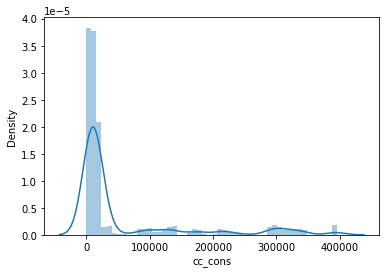

In [20]:
sns.distplot(data_existing .cc_cons)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

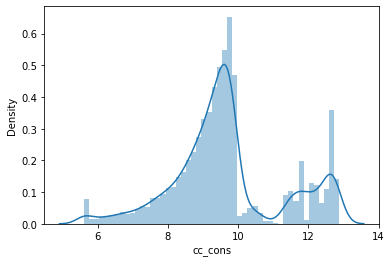

In [21]:
sns.distplot(np.log(data_existing .cc_cons))

In [22]:
data_existing ['ln_cc_cons']=np.log(data_existing ['cc_cons'])

In [23]:
data_existing .drop(columns=['cc_cons'],inplace=True)

In [26]:
# seperate the X and y columns
features = data_existing [feature_columns]
target = data_existing ['ln_cc_cons']

### VIF

In [32]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


X = data_existing 
calc_vif(X)



#Fixing Multicollinearity

# #Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
# X = df.drop(['Age','Salary'],axis=1)
# calc_vif(X)

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Avg_days_between_transaction,1.002451
1,Emp_Tenure_Years,2.997966
2,ID,1.002225
3,NetBanking_Flag,1.002802
4,Tenure_with_Bank,1.003505
5,age,2.998944
6,card_lim,1.001899
7,cc_cons_apr,1.002173
8,cc_cons_jun,1.003564
9,cc_cons_may,1.004682


### Start Building Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# method 1: divide the data into training and testing and separate out Y and X variables
X_train,X_test,y_train,y_test = train_test_split(selected_x,data_existing['ln_cc_cons'], test_size = 0.3, random_state = 7)

### Model 1 - Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression


# Fitting Linear Regression Model with scikit learn
lin_model=LinearRegression()
lin_model.fit(X_train,y_train);

### Model Evaluation Metric :

In [36]:
# Evaluating model accuracy based on Root mean square percentage error 'RMSPE'

print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - lin_model.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - lin_model.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.945646270484914
test RMSPE: 17.97369793174976


### Model 2 - Decision Trees


In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
# hyperparameter tuning of decision tree with randomized search cv

param_grid = {'max_depth' : range(5,20),'min_samples_split' : range(40,200,20)}

tree = RandomizedSearchCV(DecisionTreeRegressor( random_state = 55 ),param_grid,cv = 10,scoring ='neg_mean_squared_error', n_jobs = -1 )

tree.fit(X_train,y_train);

In [39]:
# get best parameters
print(tree.best_params_)

{'min_samples_split': 140, 'max_depth': 5}


### Model Evaluation Metric :

In [40]:
# take the best model and evaluating model accuracy based on Root mean square percentage error 'RMSPE'
print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - tree.best_estimator_.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - tree.best_estimator_.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.775722947211214
test RMSPE: 18.072177797992428


### Model 3 - Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
# hyperparameter tuning of random forest with randomized search cv
param_grid = { 'n_estimators':range(10,100,10),
               'max_depth': range(5,20),'min_samples_split':range(40,200,20)}
rf_model =  RandomizedSearchCV( RandomForestRegressor( random_state = 55 ), param_grid, cv = 5, 
                        scoring = 'neg_mean_squared_error', n_jobs = -1 )
rf_model.fit(X_train,y_train);

In [43]:
# get best parameters
print(rf_model.best_params_)

{'n_estimators': 50, 'min_samples_split': 160, 'max_depth': 6}


### Model Evaluation Metric :

In [44]:
# take the best model and evaluating model accuracy based on Root mean square percentage error RMSPE
print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - rf_model.best_estimator_.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - rf_model.best_estimator_.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.659630013410165
test RMSPE: 17.963669967569356


### Prediction for customer where target variable having missing values

In [45]:
data_pred.reset_index(drop = True, inplace = True)

In [46]:
# performing prediction by using lINEAR REGRESSION method
X_new = data_pred[X_train.columns]
y_pred = lin_model.predict(X_new.values)

In [50]:
data_pred

,Avg_days_between_transaction,Emp_Tenure_Years,ID,NetBanking_Flag,Tenure_with_Bank,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,account_type,gender,income_low,income_medium,loan_enq
0,5.0,30.1,19427,1,10,63,519000,NaN,7998.48,6881.81,9553.00,8.0,13,23,44630.50,369000.75,61887.50,1,40,5,2289.00,3124.00,2879.58,47,30,3,79085.00,44884.90,107662.02,63.0,96,14,2646.72,13659.00,14000.00,80000.0,6885.0,48134.00,46088.0,20770.0,1,1.0,628.0,1,1,1,1,0,1,1
1,12.0,14.4,16150,0,10,36,402000,NaN,16479.64,12032.60,7386.49,19.0,7,32,216770.95,243182.32,36644.25,1,7,4,415.00,6738.00,6763.00,1,16,37,85171.16,91073.84,34376.79,10.0,12,63,5469.79,942327.70,172131.00,28912.0,553.0,31820.00,17953.0,78627.0,1,1.0,656.0,1,1,1,1,0,1,1
2,13.0,4.8,11749,1,10,28,114000,NaN,29272.03,531.43,4170.53,12.0,44,30,24878.00,35467.00,50121.00,33,16,6,40994.00,3778.00,26717.30,22,37,15,44916.42,96552.00,140182.87,55.0,42,82,7207.85,70310.60,208652.00,1036.0,1089.0,400101.92,41121.0,1260.0,1,1.0,314.0,1,1,1,0,0,1,1
3,19.0,9.6,11635,1,2,32,298000,NaN,9662.31,7996.00,5261.00,24.0,47,85,224329.00,87204.35,24917.00,7,2,2,5306.39,293.00,11934.79,4,1,1,21563.58,18250.00,42694.75,32.0,10,78,591.34,101891.25,100934.00,678.0,1931.0,159847.00,32003.0,23332.0,1,1.0,614.0,1,1,1,1,0,1,1
4,18.0,12.0,8908,1,7,32,381000,NaN,13239.86,5984.75,19193.13,100.0,14,9,43451.00,83992.00,41381.00,1,21,3,7063.00,4933.00,22304.86,62,81,55,59644.00,83525.75,146116.14,67.0,12,171,2621.39,27316.50,90829.65,12000.0,10455.0,57312.04,9626.0,41672.0,1,1.0,750.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,7.0,32.2,1270,1,6,66,255000,NaN,4611.00,400.00,69121.74,5.0,9,43,56225.00,31284.00,61078.00,35,3,0,12015.50,828.04,550.50,39,42,25,39148.00,153772.21,179983.00,29.0,38,8,6334.20,199690.50,152664.00,51520.0,13135.0,29730.00,42872.0,24438.0,1,1.0,354.0,1,1,1,0,0,1,1
4989,14.0,19.8,15992,0,5,53,518000,NaN,9545.00,7977.50,4269.27,1.0,30,30,26953.00,93108.00,37545.00,13,43,47,2061.00,5299.00,901.00,8,22,5,90755.10,18098.47,17754.66,5.0,11,11,102216.02,3938.25,1752254.00,15477.0,4856.0,22103.00,36747.0,213000.0,1,1.0,809.0,1,1,1,1,0,1,1
4990,10.0,18.4,7081,0,1,66,359000,NaN,2028.93,793.08,11019.00,6.0,1,6,26327.00,46800.00,48230.00,3,3,2,9454.99,79167.80,4774.50,2,13,4,275542.16,32198.63,22093.59,11.0,38,171,1930.19,65640.00,64309.52,13873.0,2008.0,44500.00,18810.0,34327.0,1,1.0,466.0,1,1,1,0,0,1,1
4991,17.0,6.0,6821,0,8,32,523000,NaN,11456.23,21111.50,2650.08,5.0,117,6,12276.00,20201.00,112616.76,26,47,3,3999.00,11827.46,290.00,4,2,9,60498.50,27334.14,23546.48,5.0,80,82,24499.91,47936.43,11982.00,3975.0,2351.0,52612.00,11443.0,51929.0,1,1.0,619.0,1,1,1,1,1,0,1


In [48]:
Predicted_Card_consumption=pd.concat([data_pred['ID'], pd.Series(y_pred)], axis=1)
Predicted_Card_consumption.rename(columns={0:'cc_cons'},inplace=True)

In [49]:
Predicted_Card_consumption['cc_cons']=np.exp(Predicted_Card_consumption['cc_cons'])
Predicted_Card_consumption.head()

,ID,cc_cons
0,19427,14910.396601
1,16150,15666.935986
2,11749,16955.782304
3,11635,16294.674586
4,8908,14649.571378
